### Treść zadania

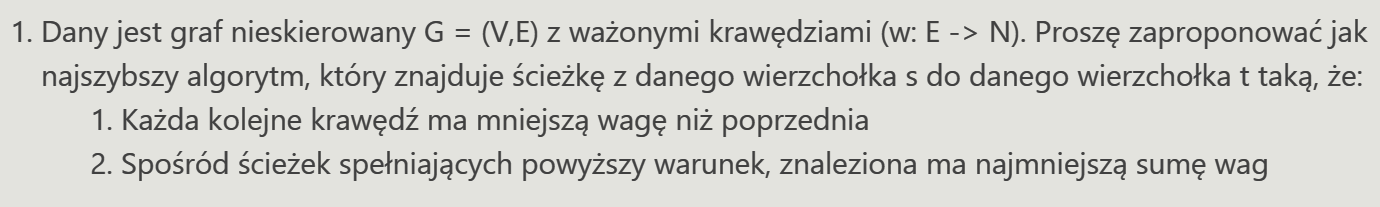

### Omówienie algorytmu

###### Wstępne omówienie:
Zadanie jest dosyć ciekawe, ponieważ musimy nieco zmienić sposób myślenia. W tym przypadku do jednego wierzchołka możemy wejść wielokrotnie, bo może się okazać, że najkrótsza pod względem sumy wag krawędzi ścieżka, która składa się z krawędzi o malejących wagach, prowadząca z wierzchołka startowego $ s $ do pewnego wierzchołka $ u $, mimo, że jest najkrótszą ścieżką z $ s $ do $ u $, nie umożliwi nam dotarcia do celu, ponieważ np. wszystkie kolejne krawędzie wychodzące z wierzchołka $ u $, mają wagi większe od wagi tej krawędzi którą przyszliśmy (a jeżeli graf jest nieskierowany, to po prostu każda krawędź poza tą, którą przyszliśmy, ma większą wagę od niej). W tym celu konieczne jest spojrzenie na krawędzie w grafie jak na wierzchołki (nie musimy, a nawet nie powinniśmy budować grafu krawędziowego, ponieważ gdybyśmy potraktowali wierzchołki jako krawędzie, otrzymalibyśmy ogromny graf). Konieczne jest zatem przyjęcie takiej strategii, że wyznaczamy najkrótsze ścieżki, ale nie do każego z wierzchołków, ale do każdej z krawędzi, tzn. zapisujemy długość najkrótszej ścieżki, jaką mozemy dojść do danej krawędzi i przez nią przejść (sumaryczną wagę każdej z krawędzi po drodze). Tym sposobem mamy pewność, że nie zablokujemy sobie możliwości odwiedzenia wierzchołka kolejny raz, gdy np. poprzednia najkrótsza ścieżka, przez niego przechodząca, nie pozwoliła nam dotrzeć do celu. Ponieważ chcemy móc szybko porównywać wagi ścieżek, musimy spamiętywać rozwiązania. Przyda nam się do tego celu macierz o rozmiarze $ V \times V $, ponieważ maksymalnie możemy mieć w grafie $ O(V^2) $ krawędzi (jeżeli jest mowa o grafie, bez zaznaczenia, że jest to multigraf, przyjmujemy, że nie ma w nim krawędzi wielokrotnych). W tej pomocniczej tablicy będziemy zapisywać wartości w następujący sposób:
<br><br>
- $ W[u][v] $ - minimalna waga ścieżki, która kończy się krawędzią $ u - v $ (o malejących krawędziach) (z wliczonym kosztem krawędzi $ u - v $ do kosztu ścieżki)

###### Jak działa algorytm?
##### Krok 1:
Ponieważ poruszamy się krawędziami, naszą bieżącą pozycję musimy oznaczać, przy pomocy krawędzi, którą obecnie przetwarzamy. Musimy również jakoś wyruszyć w poszukiwaniu najkrótszej ścieżki, a więc wrzucamy najpierw do kolejki priorytetowej wszystkie krawędzie, którymi możemy wyjść z wierzchołka startowego $ s $ z priorytetem równym ich wagom, drugą wartością w postaci wagi tylko tej krawędzi (dla reprezentacji listowej, a dla macierzowej pomijamy tę wartość) - przyda się nam ona, przy "wydłużaniu" ścieżek do innych krawędzi, a na koniec wrzucamy współrzędne krawędzi tj. parę wierzchołków $ u $, $ v $, która oznacza, że idziemy krawędzią z $ u $ do $ v $.
##### Krok 2:
W pętli dokonujemy relaksacji kolejnych krawędzi, wybierając, podbnie jak w algorytmie Dijkstry, krawędź o najmniejszej długości ścieżki do niej prowadzącej (wraz z długością tej krawędzi), a następnie, jeżeli sumaryczna waga jest mniejsza niż poprzednia najlepsza (w tym przypadku taka sytuacja zdarzy się tylko raz, ponieważ dokonujemy relaksacji na krawędzi, dopiero po zdjęciu jej z kolejki, więc muszą już znaleźć się w kolejce wszystkie krawędzie poprzednie, jakimi możemy dotrzeć do tej krawędzi. Równie dobrze moglibyśmy dokonywać wielokrotnej relaksacji w pętli, przy dodawaniu krawędzi do kolejki (por. Dijkstra z wykładu), ale niepotrzebnie zwiększa nam to liczbę operacji). Po relaksacji sprawdzamy, czy wierzchołek, do którego weszliśmy ostatnią krawędzią na rozważanej w danym momencie ścieżce, jest wierzchołkiem docelowym. Jeżeli tak, to, ponieważ trzymaliśmy w kolejce długość ścieżki wraz z wliczoną wagą (długością) ostatniej krawędzi, mamy pewność, że jest to najkrótsza ścieżka, jaką możemy dotrzeć do wierzchołka docelowego.
<br><br>
Pozostaje jeszcze bardzo ważna kwestia, dotycząca uwzględnienia tego, że wagi krawędzi mają maleć. W tym miejscu przydaje nam się umieszczony w kolejce drugi argument, czyli waga ostatniej krawędzi na ścieżce (lub po prostu wartość $ G[u][v] $ w reprezentacji macierzowej grafu). Pozwala nam on na stwierdzenie, do jakich krawędzi możemy wejść z danej krawędzi. W pętli sprawdzamy wszystkich sąsiadów wierzchołka końcowego krawędzi, którą się poruszamy i, jeżeli waga znalezione krawędzi $ v - w $, gdzie $ w $ - sąsiad $ v $, jest mniejsza od wagi krawędzi $ u - v $ i jednocześnie nie istnieje jeszcze najkrótsza ścieżkam uwzględniająca krawędź $ v - w $, dodajemy do kolejki bieżącą ścieżkę, powiększoną o tę krawędź.

###### Dlaczego algorytm jest poprawny?
Najważniejsze jest przemyślenie tego, w jaki sposób dobieramy kolejne krawędzie. Zawsze po zdjęciu jakiejś krawędzi z kolejki, mamy pewność, że wszystkie poprzednie krawędzie zostały wybrane prawidłowo. W dodatku, nie obchodzi nas to, jakie miały one wagi, ważne jest tylko to, jaką wagę ma ostatnia krawędź. Ponieważ zawsze badamy wszystkie możliwe krawędzie, które możemy dołożyć do naszej ścieżki, nie istnieje możliwość, abyśmy nie uwzględnili którejś ze ścieżek o malejących wagach.

###### UWAGA:
Algorytm działa dla grafów nieskierowanych oraz skierowanych. Ponieważ opiera się on na algorytmie Dijkstry, wagi krawędzi muszą być nieujemne. Może się zdarzyć sytuacja, że ścieżka, spełniająca warunki zadania (malejące krawędzie) miedzy parą wierzchołków nie istnieje i takie rozwiązanie jest całkowicie poprawne.

 # Dla listowej reprezentacji grafu

### Złożoność

###### Obliczeniowa:
$ O(E \cdot V + E \cdot log(E)) = O(E \cdot V + E \cdot log(V)) = O(E \cdot V) $  - taka, dla każdej krawędzi sprawdzamy wszystkich sąsiadów kończącego krawędź wierzchołka, a ich może być $ O(V) $, a w najgorszym przypadku musimy przejść wszystkimi krawędziami w grafie. Stąd otrzymujemy składnik $ E \cdot V $. Mamy jeszcze $ E \cdot log(E) $, bo w kolejce priorytetowej może być maksymalnie $ E $ krawędzi.
###### Pamięciowa:
$ O(V^2) $

### Implementacja #1

In [1]:
from queue import PriorityQueue


def dijkstra_decreasing_edges(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    if s == t: return 0
    
    n = len(G)
    inf = float('inf')
    W = [[inf] * n for _ in range(n)]
    pq = PriorityQueue()
    
    for v, weight in G[s]:
        pq.put((weight, weight, s, v))
        
    while not pq.empty():
        min_w, prev_weight, u, v = pq.get()
        if min_w < W[u][v]:
            W[u][v] = min_w
            if v == t: return min_w
            for w, weight in G[v]:
                if weight < prev_weight and W[v][w] == inf:
                    pq.put((min_w + weight, weight, v, w))
    
    return -1

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

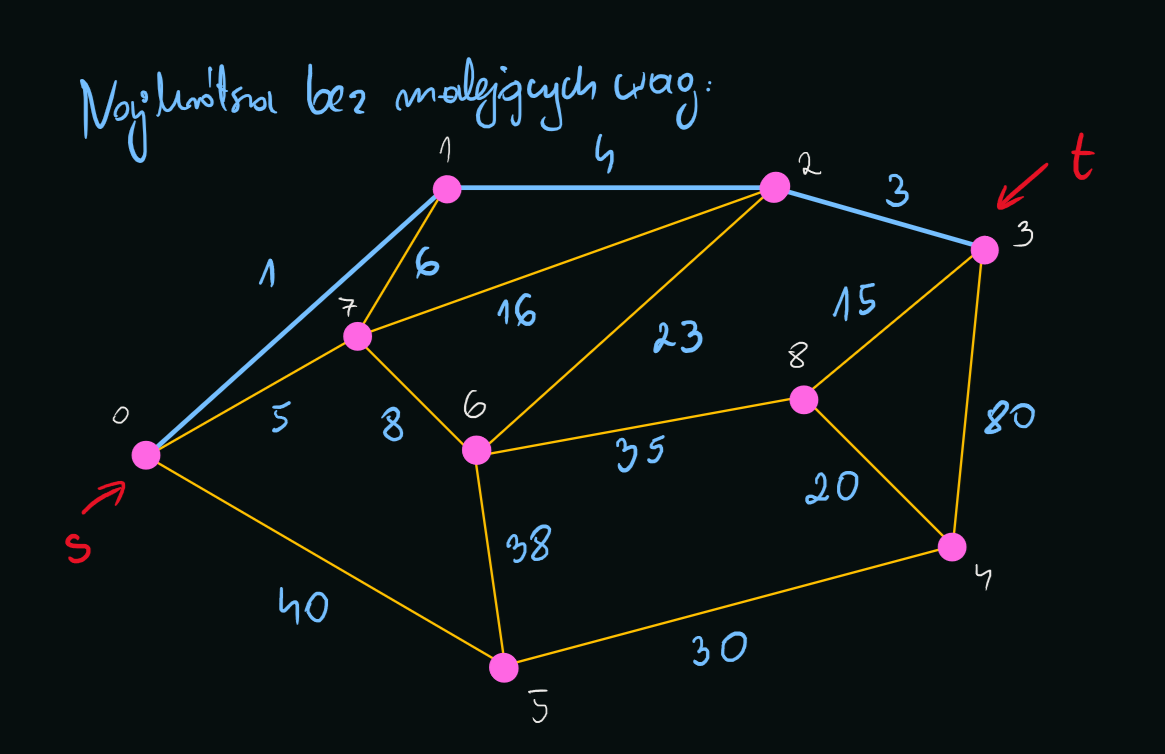

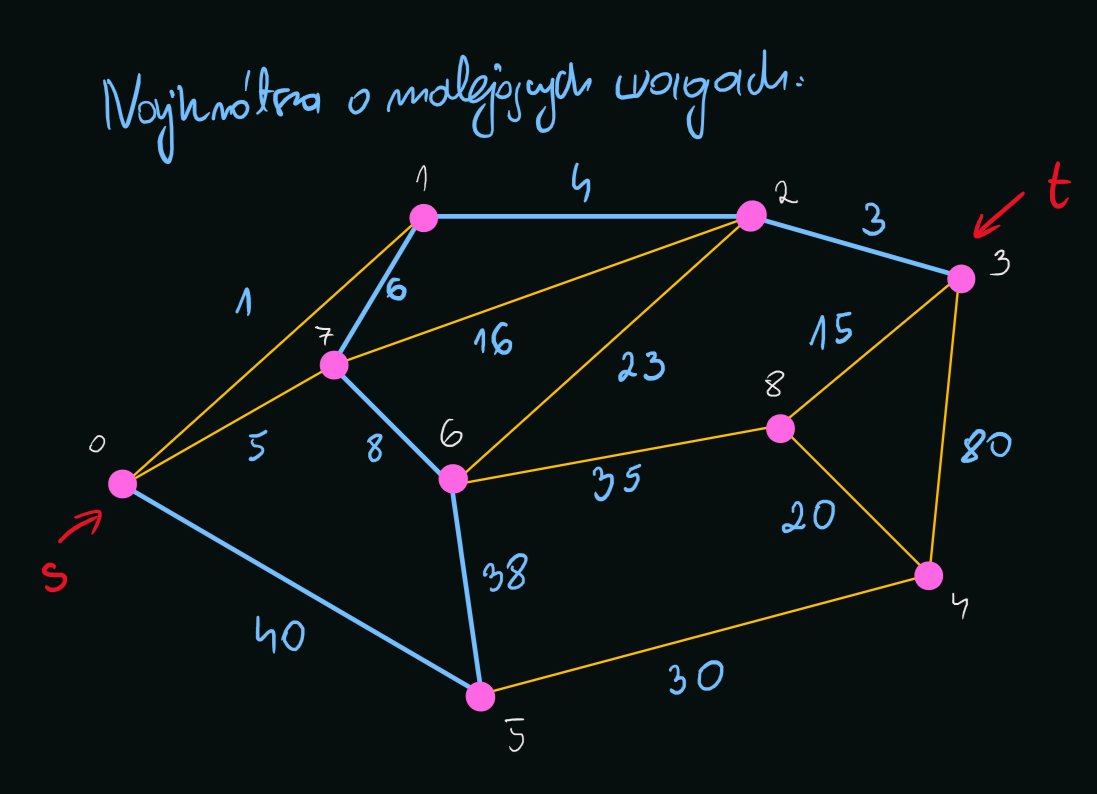

In [3]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges(G, 0, 3))
print(dijkstra_decreasing_edges(G, 1, 3))
print(dijkstra_decreasing_edges(G, 3, 1))
print(dijkstra_decreasing_edges(G, 2, 0))

99
7
-1
5


### (Dodatkowo) Zwracanie znalezionej ścieżki

In [4]:
from queue import PriorityQueue


def dijkstra_decreasing_edges_path(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    if s == t: return 0
    
    n = len(G)
    inf = float('inf')
    W = [[inf]  * n for _ in range(n)]
    P = [[None] * n for _ in range(n)]
    pq = PriorityQueue()
    
    for v, weight in G[s]:
        pq.put((weight, weight, s, v, None))
        
    last_u = None
        
    while not pq.empty():
        min_w, prev_weight, u, v, parent = pq.get()
        if min_w < W[u][v]:
            W[u][v] = min_w
            P[u][v] = parent
            if v == t: 
                last_u = u
                break
            for w, weight in G[v]:
                if weight < prev_weight and W[v][w] == inf:
                    pq.put((min_w + weight, weight, v, w, u))
    
    return (get_path(P, last_u, t), W[last_u][t]) if last_u is not None else ([], 0)


def get_path(P: 'array of edges parents', u: 'last edge first vertex', t: 'last edge second vertex'):
    path = [t]
    
    while u is not None:
        path.append(u)
        u, t = P[u][t], u
        
    return path[::-1]

###### Kilka testów

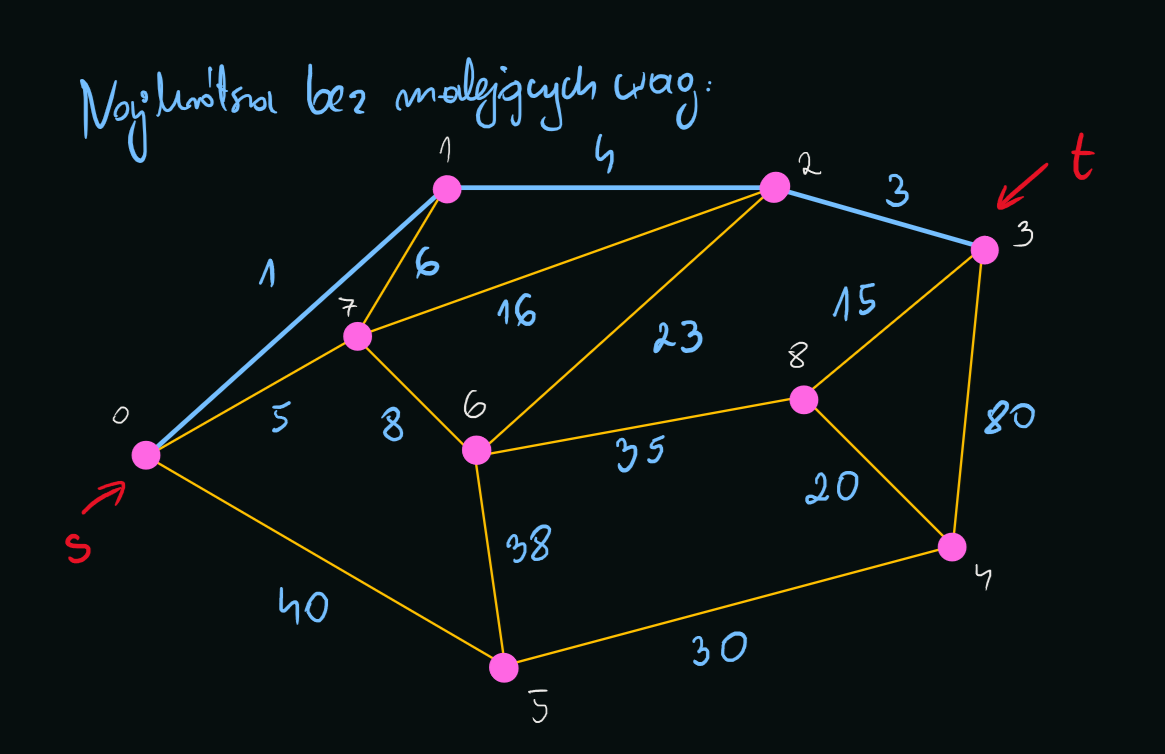

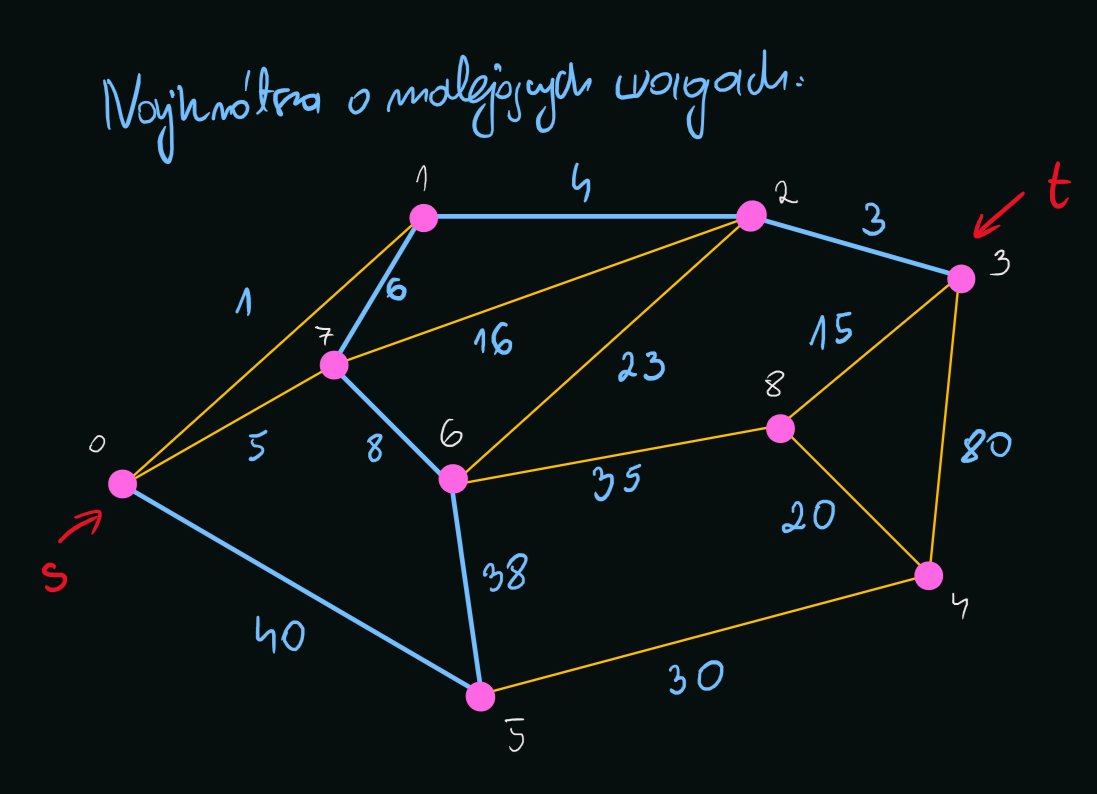

In [5]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges_path(G, 0, 3))
print(dijkstra_decreasing_edges_path(G, 1, 3))
print(dijkstra_decreasing_edges_path(G, 3, 1))
print(dijkstra_decreasing_edges_path(G, 2, 0))

([0, 5, 6, 7, 1, 2, 3], 99)
([1, 2, 3], 7)
([], 0)
([2, 1, 0], 5)


In [6]:
# ([0, 2, 4, 3], 12)
E = [[0, 1, 10], [0, 2, 5], [1, 0, 10], [1, 2, 1], [1, 3, 3], [1, 4, 2], [2, 0, 5], [2, 1, 1], 
     [2, 3, 6], [2, 4, 4], [3, 1, 3], [3, 2, 6], [3, 4, 3], [3, 5, 2], [4, 1, 2], [4, 2, 4], 
     [4, 3, 3], [4, 5, 1], [5, 3, 2], [5, 4, 1]]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges_path(G, 0, 3))

([0, 2, 4, 3], 12)


In [7]:
E = [[0, 1, 10], [1, 2, 10], [0, 3, 4], [3, 2, 3]]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges_path(G, 0, 2))

([0, 3, 2], 7)


In [8]:
E = [[0, 1, 9], [1, 0, 9], [1, 2, 10], [1, 6, 8], [2, 1, 10], [2, 3, 4], [3, 2, 4], [3, 4, 5], 
     [4, 3, 5], [4, 5, 6], [5, 4, 6], [5, 6, 7], [6, 2, 8], [6, 5, 7]]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges_path(G, 0, 2))

([0, 1, 6, 5, 4, 3, 2], 39)


In [9]:
E = [[0, 1, 2], [0, 2, 4], [1, 0, 2], [1, 2, 10], [1, 4, 12], [1, 5, 100], [2, 0, 4], [2, 1, 10], 
     [2, 3, 3], [3, 2, 3], [3, 4, 2], [4, 3, 2], [4, 1, 12], [4, 5, 1], [5, 1, 100], [5, 4, 1]]

G = undirected_weighted_graph_list(E)

print(dijkstra_decreasing_edges_path(G, 0, 5))

([0, 2, 3, 4, 5], 10)


 # Dla macierzowej reprezentacji grafu

Implementacja niemalże identyczna. Różnica jest tylko taka, że nie musimy pamiętać wagi ostatniej krawędzi (tej krawędzi, którą ściągamy z kolejki), ponieważ możemy ją odczytać z macierzy, reprezentującej graf.
###### UWAGA:
W tym przypadku wymyślenie tricku na przyspieszenie algorytmu, jak miało to miejsce w przypadku algorytmu Dijkstry dla reprezentacji macierzowej grafu, nie jest łatwe, ponieważ tym razem przeglądamy wszystkie krawędzie, a w każdym kroku pętli przemieszczamy się o 1 krawędź, więc chcąc zastosować takie samo podejście jak to, które zostało tam przedstawione, otrzymalibyśmy złożoność $ O(V^4) $, a nie $ O(E \cdot V + E \cdot log(E)) $

### Złożoność

###### Obliczeniowa:
$ O(E \cdot V + E \cdot log(E)) = O(E \cdot V + E \cdot log(V)) = O(E \cdot V) $  - jak wyżej.
###### Pamięciowa:
$ O(V^2) $  - musimy zapisywać długości ścieżek, więc nie da się w miejscu bez zniszczenia grafu. Jeżeli moglibyśmy popsuć graf, algorytm działałby w miejscu (wagi byśmy wpisywali bezpośrednio do macierzy, reprezentującej graf, ale tego już nie da się łatwo naprawić).

### Implementacja #1

In [10]:
from queue import PriorityQueue


def dijkstra_decreasing_edges(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    if s == t: return 0
    
    n = len(G)
    inf = float('inf')
    W = [[inf] * n for _ in range(n)]
    pq = PriorityQueue()
    
    for v in range(n):
        if G[s][v] == inf: continue
        pq.put((G[s][v], s, v))
        
    while not pq.empty():
        min_w, u, v = pq.get()
        if min_w < W[u][v]:
            W[u][v] = min_w
            if v == t: return min_w
            for w in range(n):
                if G[v][w] == inf: continue
                if G[v][w] < G[u][v] and W[v][w] == inf:
                    pq.put((min_w + G[v][w], v, w))
    
    return -1

###### Kilka testów

##### Pomocnicze

In [11]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    inf = float('inf')
    G = [[inf] * n for _ in range(n)]  # inf means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

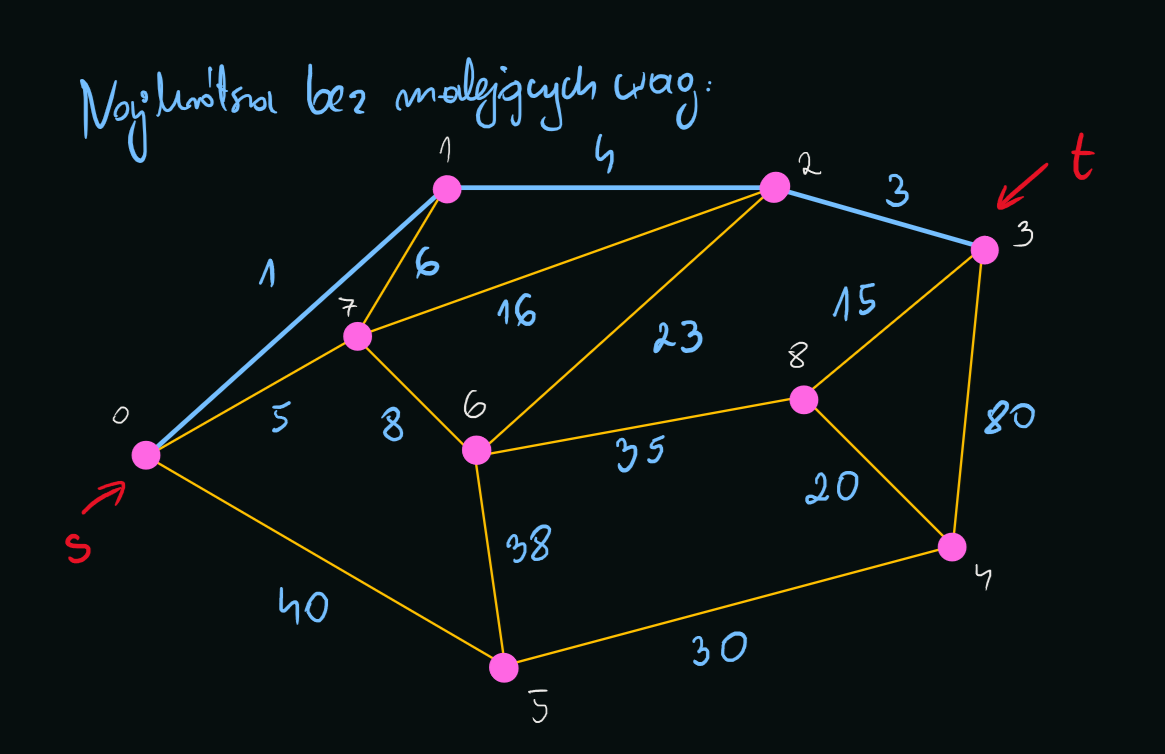

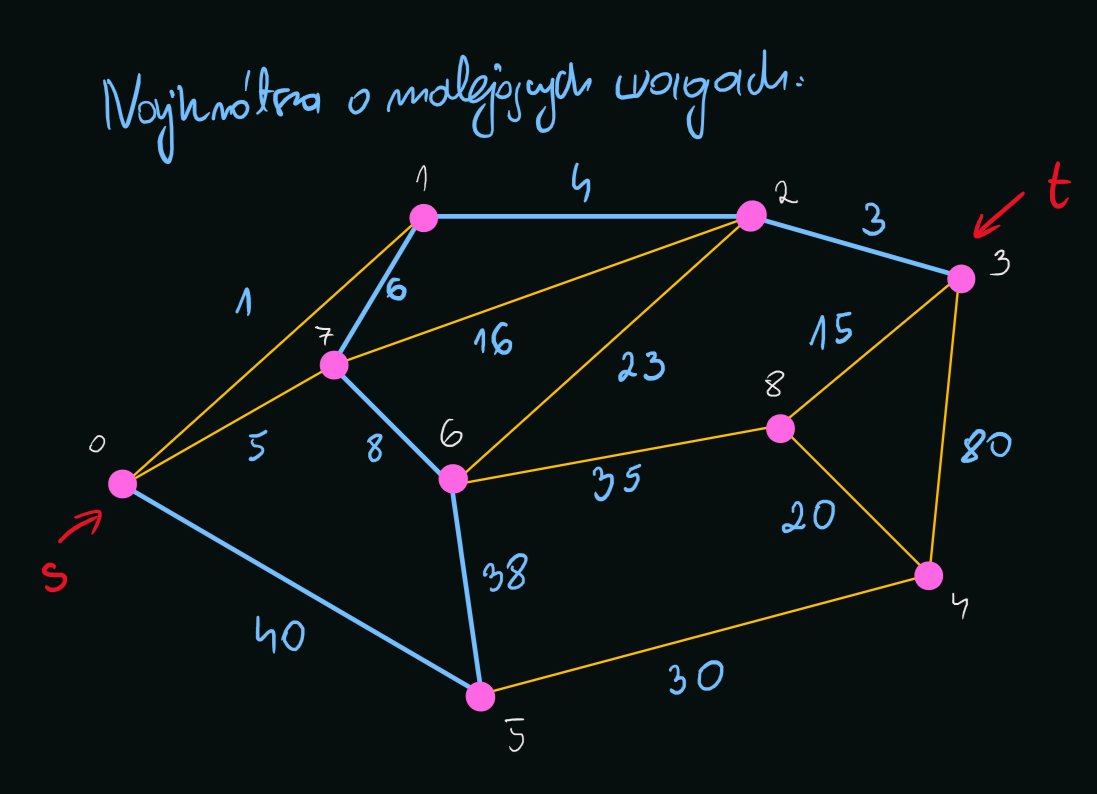

In [12]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_matrix(E)

print(dijkstra_decreasing_edges(G, 0, 3))
print(dijkstra_decreasing_edges(G, 1, 3))
print(dijkstra_decreasing_edges(G, 3, 1))
print(dijkstra_decreasing_edges(G, 2, 0))

99
7
-1
5


### (Dodatkowo) Zwracanie znalezionej ścieżki

In [13]:
from queue import PriorityQueue


def dijkstra_decreasing_edges_path(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    if s == t: return 0
    
    n = len(G)
    inf = float('inf')
    W = [[inf]  * n for _ in range(n)]
    P = [[None] * n for _ in range(n)]
    pq = PriorityQueue()
    
    for v in range(n):
        if G[s][v] == inf: continue
        pq.put((G[s][v], s, v, None))
        
    last_u = None
        
    while not pq.empty():
        min_w, u, v, parent = pq.get()
        if min_w < W[u][v]:
            W[u][v] = min_w
            P[u][v] = parent
            if v == t: 
                last_u = u
                break
            for w in range(n):
                if G[v][w] == inf: continue
                if G[v][w] < G[u][v] and W[v][w] == inf:
                    pq.put((min_w + G[v][w], v, w, u))
    
    return get_path(P, last_u, t) if last_u is not None else []


def get_path(P: 'array of edges parents', u: 'last edge first vertex', t: 'last edge second vertex'):
    path = [t]
    
    while u is not None:
        path.append(u)
        u, t = P[u][t], u
        
    m = len(path)
    for i in range(m // 2):
        swap(path, i, m - 1 - i)
        
    return path


def swap(A, i, j):
    A[i], A[j] = A[j], A[i]

###### Kilka testów

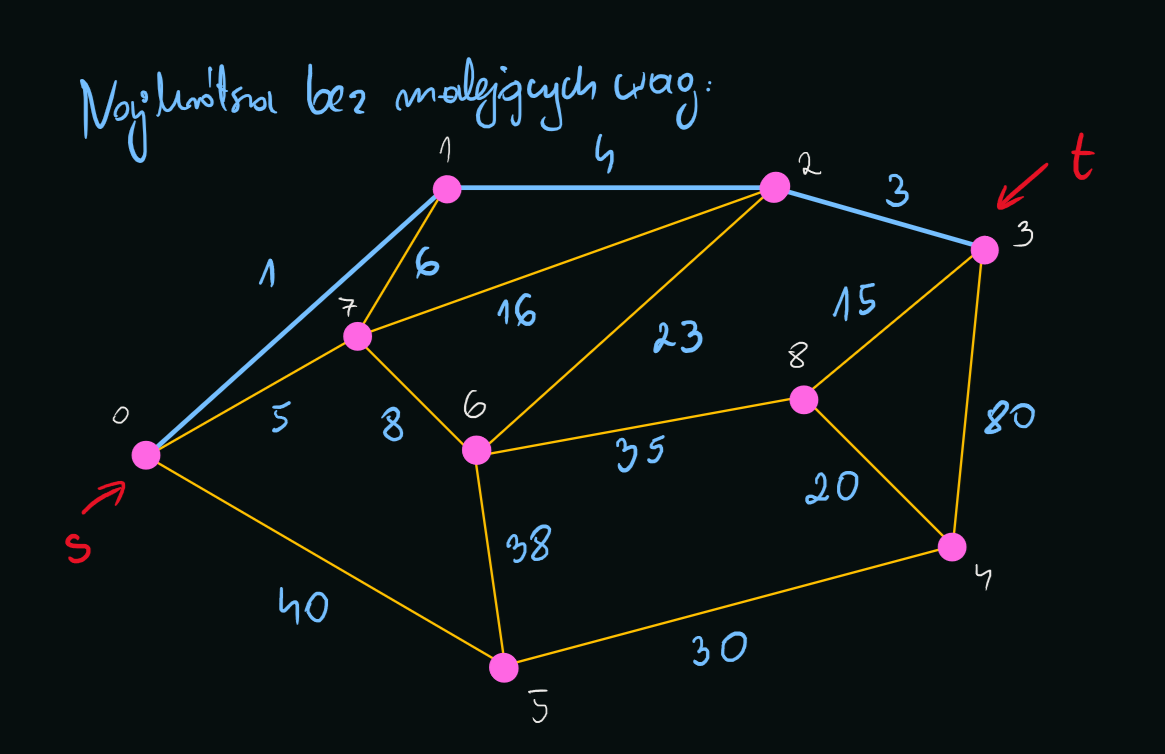

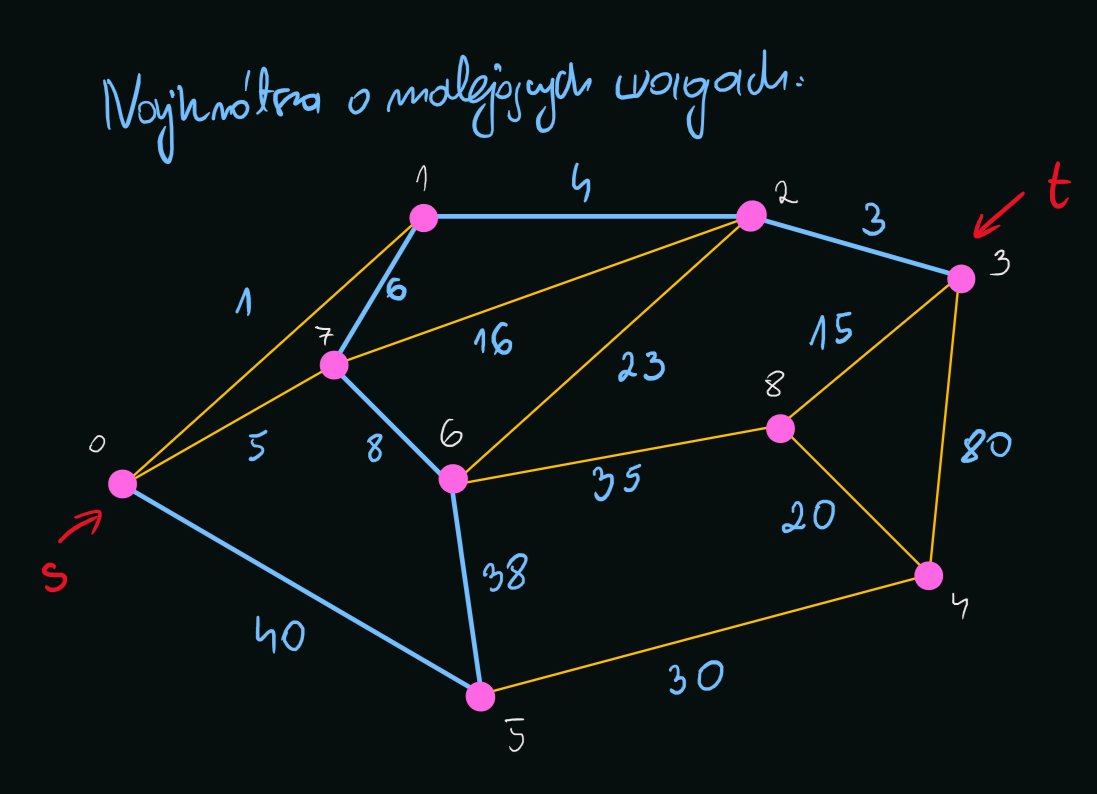

In [14]:
E = [(0, 1, 1), (1, 2, 4), (2, 3, 3), (0, 5, 40), (5, 6, 38), (0, 7, 5), (6, 7, 8), (7, 1, 6),
     (7, 2, 16), (6, 2, 23), (6, 8, 35), (5, 4, 30), (8, 4, 20), (8, 3, 15), (4, 3, 80)]

G = undirected_weighted_graph_matrix(E)

print(dijkstra_decreasing_edges_path(G, 0, 3))
print(dijkstra_decreasing_edges_path(G, 1, 3))
print(dijkstra_decreasing_edges_path(G, 3, 1))
print(dijkstra_decreasing_edges_path(G, 2, 0))

[0, 5, 6, 7, 1, 2, 3]
[1, 2, 3]
[]
[2, 1, 0]
